In [1]:
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
import tensorflow.keras.backend as K

import matplotlib.pyplot as plt

In [2]:
processedData = pd.read_csv("F:\Circus Social ML Task\Data\processedData.csv", index_col= ['Published DateTime'])

In [3]:
processedData

,Line Count,Word Count,Language,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Mentions Count,Post author verified,Likes,Shares,Comments,Hour,Media Type 2,Media Type 1,Impact
Published DateTime,,,,,,,,,,,,,,,,,,,
2020-03-31 18:37:46+00:00,1,12,10,0.00,127.0,0.0,1.0,3674.0,154.0,0,0.0,0.0,0.0,0.0,0.0,18,0,0,0.0
2020-03-31 18:45:47+00:00,5,44,10,0.00,303.0,1.0,1.0,386323.0,5779057.0,26399,0.0,1.0,89.0,57.0,0.0,18,0,0,1460.0
2020-03-31 18:47:30+00:00,7,21,10,0.00,211.0,3.0,0.0,9985.0,341.0,0,1.0,0.0,42.0,60.0,0.0,18,0,0,1020.0
2020-03-31 19:11:04+00:00,1,21,10,-10.59,149.0,0.0,0.0,150775.0,2542491.0,10522,0.0,1.0,9242.0,6455.0,0.0,19,0,0,156970.0
2020-03-31 19:34:25+00:00,1,43,10,0.00,260.0,1.0,0.0,940.0,13985263.0,9235,1.0,1.0,53823.0,9080.0,8.0,19,0,1,629110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-30 12:45:44+00:00,8,48,20,11.62,301.0,0.0,0.0,30678.0,14481.0,10,0.0,0.0,5812.0,6312.0,3.0,12,0,1,121270.0
2021-05-30 13:30:00+00:00,1,10,10,0.00,64.0,0.0,0.0,122072.0,173070.0,236,0.0,1.0,10351.0,818.0,0.0,13,0,1,111690.0
2021-05-30 14:27:02+00:00,1,10,10,0.00,76.0,1.0,1.0,1895.0,1119518.0,7026,0.0,1.0,11447.0,1373.0,7.0,14,0,1,128270.0


In [4]:
# Train-test split

X = processedData.iloc[:,:-1]
y = processedData.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Shallow Neural Network Model

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(18,input_dim=18, kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dense(1, kernel_initializer='normal'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 18)                342       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 19        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [8]:
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=50000,
    decay_rate=0.20)

callBack = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 50, restore_best_weights=True, mode = 'min')

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule),loss=root_mean_squared_error)


In [9]:
%%time

history = model.fit(X_train, y_train,epochs=30, validation_data=(X_test,y_test), callbacks= [callBack])

Epoch 1/30
1250/1250 [==============================] - 1s 633us/step - loss: 88709.9297 - val_loss: 81734.9609
Epoch 2/30
1250/1250 [==============================] - 1s 519us/step - loss: 67510.6719 - val_loss: 49592.3398
Epoch 3/30
1250/1250 [==============================] - 1s 524us/step - loss: 27528.9238 - val_loss: 6750.7017
Epoch 4/30
1250/1250 [==============================] - 1s 554us/step - loss: 1703.4202 - val_loss: 831.8106
Epoch 5/30
1250/1250 [==============================] - 1s 565us/step - loss: 682.5881 - val_loss: 761.6868
Epoch 6/30
1250/1250 [==============================] - 1s 547us/step - loss: 629.0929 - val_loss: 670.2449
Epoch 7/30
1250/1250 [==============================] - 1s 538us/step - loss: 578.7374 - val_loss: 599.0374
Epoch 8/30
1250/1250 [==============================] - 1s 535us/step - loss: 537.1852 - val_loss: 621.2802
Epoch 9/30
1250/1250 [==============================] - 1s 538us/step - loss: 505.4258 - val_loss: 525.9497
Epoch 10/30
1250

In [10]:
y_pred = model.predict(X_test)

In [11]:
mean_squared_error(y_test, y_pred, squared = False)

37.908886382446894

In [12]:
results = pd.DataFrame({'y_true':y_test['Impact'].tolist(), 'y_pred': y_pred.flatten()})

<AxesSubplot:>

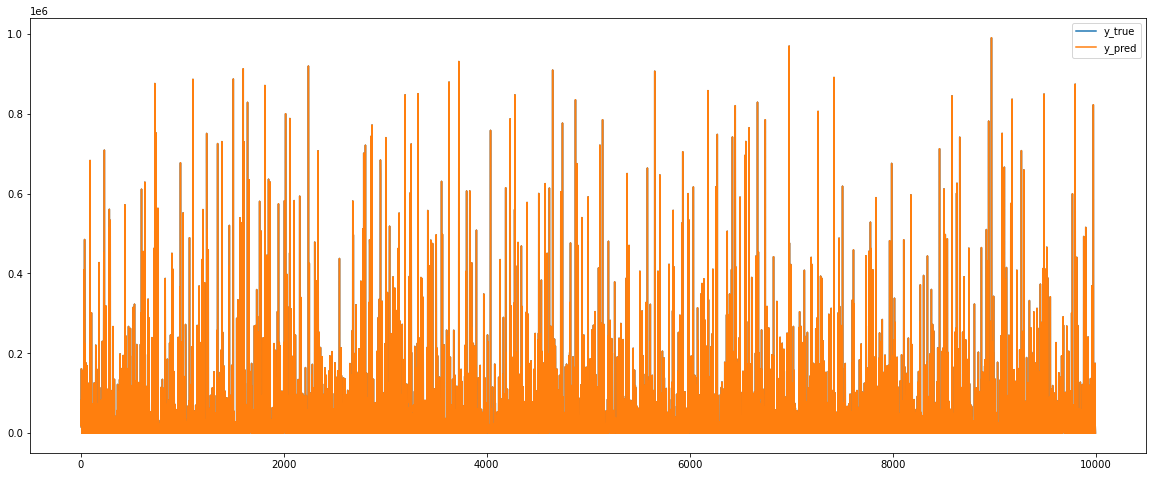

In [13]:
results.plot(figsize = (20,8))

In [14]:
resultsData = pd.DataFrame(history.history)

<AxesSubplot:>

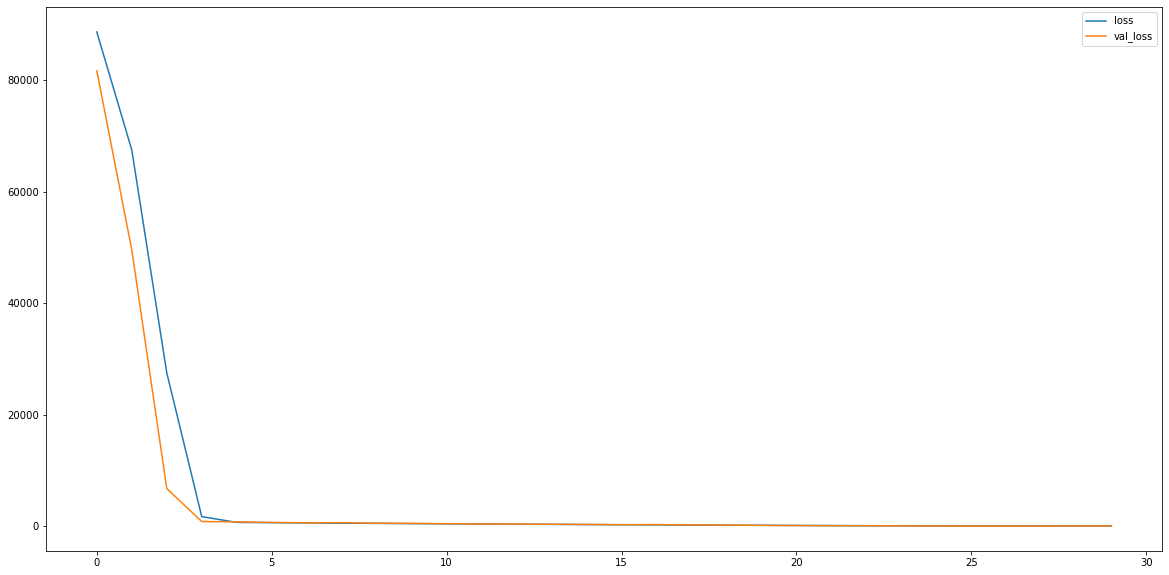

In [15]:
resultsData.plot(figsize = (20,10))